In [1]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt

# Running variety of algorithms.

c:\users\stone\desktop\fall20~1\probmo~1\project\proj_env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\stone\desktop\fall20~1\probmo~1\project\proj_env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\stone\desktop\fall20~1\probmo~1\project\proj_env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\stone\desktop\fall20~1\probmo~1\project\proj_env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default

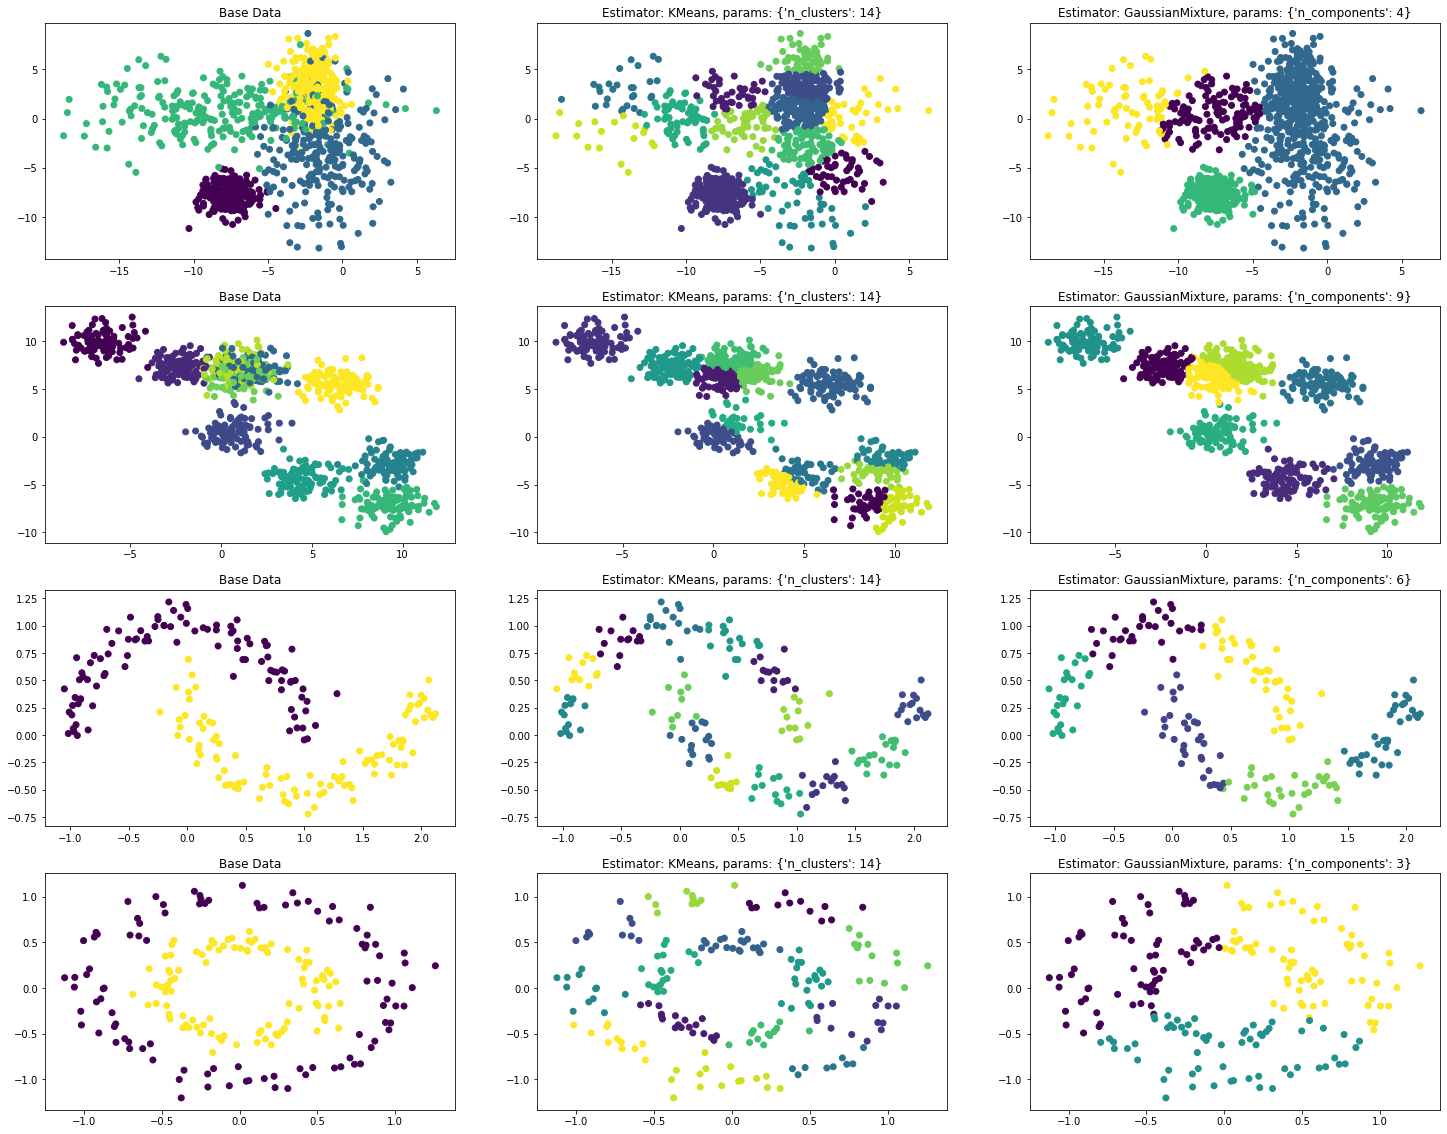

In [99]:
# Defining estimators and params.
estimators = [KMeans(), GaussianMixture()]
param_grids = [
    {'n_clusters': range(1, 15)},
    {'n_components': range(1, 15)},
    {'n_clusters': range(1, 15)}
]

# Defining datasets
circX, circy = make_circles(n_samples=200, factor=.5, noise=.1)
blobX, bloby = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=[[np.random.randint(1,5), np.random.randint(1,5)] for _ in range(4)])
blobX2, bloby2 = make_blobs(n_samples=1000, n_features=2, centers=10)
moonX, moony = make_moons(n_samples=200, noise=.1)
datasets = [(blobX, bloby), (blobX2, bloby2), (moonX, moony), (circX, circy)]
fig, axs = plt.subplots(nrows=len(datasets), ncols=len(estimators)+1, figsize=(25,20))

for (X, y), axs_row in zip(datasets, axs):
    axs_row[0].set_title('Base Data')
    axs_row[0].scatter(X[:, 0], X[:, 1], c=y)

    axs_row = axs_row[1:]
    for estimator, ax, param_grid in zip(estimators, axs_row, param_grids):
        gv_results = GridSearchCV(estimator, param_grid).fit(X, y)
        preds = gv_results.best_estimator_.predict(X)
        ax.scatter(X[:, 0], X[:, 1], c=preds)
        ax.set_title('Estimator: {}, params: {}'.format(type(estimator).__name__, gv_results.best_params_))
        
plt.savefig("Composition")